In [8]:
import pandas as pd
import yaml
root_path = '/local/work/merengelke/aipal/'
config = yaml.load(open('cfg.yaml', 'r'), Loader=yaml.FullLoader)

cities_countries = config['cities_countries']
paths = [f"{root_path}{city_country}/aipal/predict.csv" for city_country in cities_countries]

df = pd.DataFrame()
for path in paths:
    df_small = pd.read_csv(path)
    df_small['city_country'] = path.split('/')[-3]
    df = pd.concat([df, df_small])
    
# age over 18
if config['is_adult']:
    df = df[df['age'] > 18]
else:
    df = df[df['age'] <= 18]
df.drop(columns=['ELN', 'Diagnosis', 'additional.diagnosis.details..lineage.etc', 'lineage.details'], inplace=True, errors='ignore')

Missing values in 'age': 0
Missing values in 'sex': 280


/tmp/ipykernel_2081775/3144854290.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='age', data=df, palette="coolwarm")


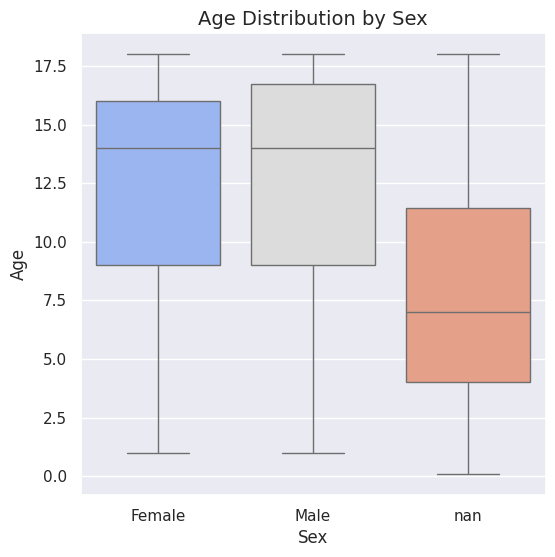

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df.sex = df['sex'].str.strip()
df.sex = df['sex'].str.capitalize()

# Step 2: Drop duplicate columns if necessary
df = df.loc[:, ~df.columns.duplicated()]

# Step 3: Check for NaN or missing values in the 'age' and 'sex' columns
print("Missing values in 'age':", df['age'].isnull().sum())
print("Missing values in 'sex':", df['sex'].isnull().sum())

# Step 4: Ensure correct data types
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert 'age' to numeric, invalid parsing as NaN
df['sex'] = df['sex'].astype(str)  # Convert 'sex' to string

# Step 5: Drop rows with missing values in 'age' or 'sex' (if necessary)
df.dropna(subset=['age', 'sex'], inplace=True)

# Create the boxplot
plt.figure(figsize=(6, 6))
sns.set(style="darkgrid")

# Plotting the boxplot with 'sex' on x-axis and 'age' on y-axis
sns.boxplot(x='sex', y='age', data=df, palette="coolwarm")

# Adding title and labels
plt.title('Age Distribution by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Show the plot
plt.show()